In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

(300, 2)


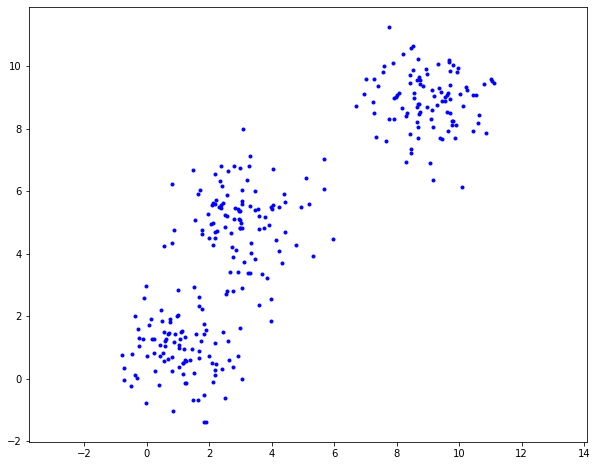

In [2]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)
print(X.shape)

plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'b.')
plt.axis('equal')
plt.show()

[[2.62524928 0.60799782]
 [0.56955843 1.47768251]
 [7.9816197  9.01443001]]


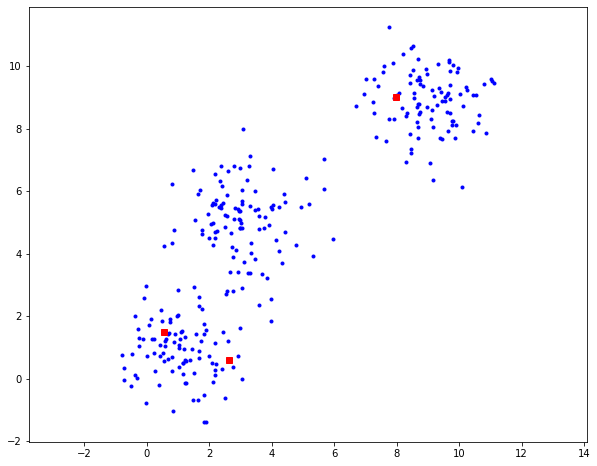

In [7]:
# The number of clusters and data
k = 3
m = X.shape[0]

# ramdomly initialize mean points
mu = X[np.random.randint(0, m, k), :]
pre_mu = mu.copy()
print(mu)

plt.figure(figsize = (10, 8))
plt.plot(X[:,0], X[:,1], 'b.')
plt.plot(mu[:,0], mu[:,1], 's', color='r')
plt.axis('equal')
plt.show()

In [8]:
y = np.empty([m,1])

# Run K-means
for n_iter in range(500):
    for i in range(m):
        d0 = np.linalg.norm(X[i,:] - mu[0,:], 2)
        d1 = np.linalg.norm(X[i,:] - mu[1,:], 2)
        d2 = np.linalg.norm(X[i,:] - mu[2,:], 2)

        y[i] = np.argmin([d0, d1, d2])
    
    err = 0
    for i in range(k):
        mu[i,:] = np.mean(X[np.where(y == i)[0]], axis = 0)
        err += np.linalg.norm(pre_mu[i,:] - mu[i,:], 2)
    
    pre_mu = mu.copy()
    
    if err < 1e-10:
        print("Iteration:", n_iter)
        break 

Iteration: 6


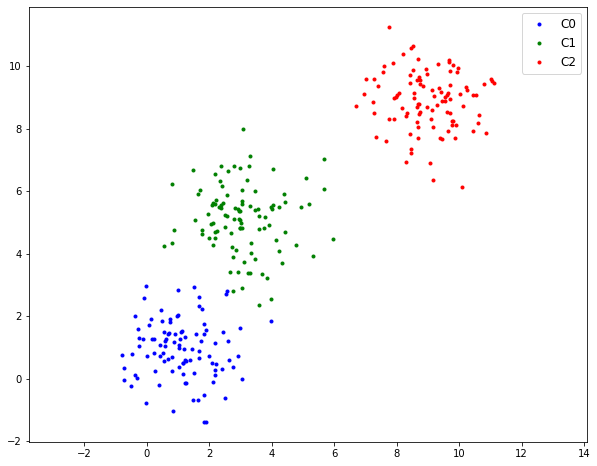

In [9]:
X0 = X[np.where(y==0)[0]]
X1 = X[np.where(y==1)[0]]
X2 = X[np.where(y==2)[0]]

plt.figure(figsize = (10, 8))
plt.plot(X0[:,0], X0[:,1], 'b.', label = 'C0')
plt.plot(X1[:,0], X1[:,1], 'g.', label = 'C1')
plt.plot(X2[:,0], X2[:,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

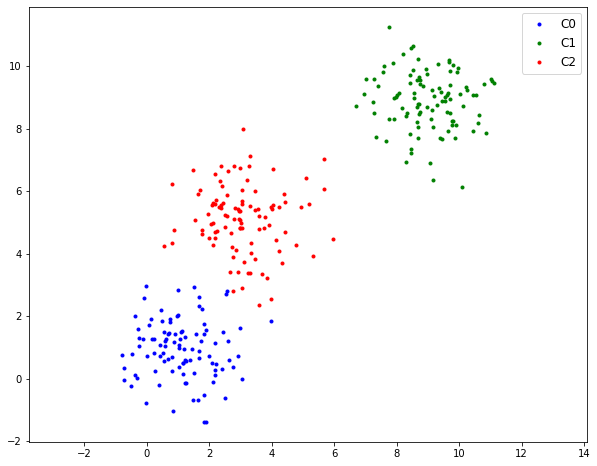

In [10]:
# use kmeans from the scikit-learn module

from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 3, random_state = 0)
kmeans.fit(X)

plt.figure(figsize = (10,8))
plt.plot(X[kmeans.labels_ == 0,0],X[kmeans.labels_ == 0,1], 'b.', label = 'C0')
plt.plot(X[kmeans.labels_ == 1,0],X[kmeans.labels_ == 1,1], 'g.', label = 'C1')
plt.plot(X[kmeans.labels_ == 2,0],X[kmeans.labels_ == 2,1], 'r.', label = 'C2')
plt.axis('equal')
plt.legend(fontsize = 12)
plt.show()

In [11]:
# data generation
G0 = np.random.multivariate_normal([1, 1], np.eye(2), 100)
G1 = np.random.multivariate_normal([3, 5], np.eye(2), 100)
G2 = np.random.multivariate_normal([9, 9], np.eye(2), 100)

X = np.vstack([G0, G1, G2])
X = np.asmatrix(X)

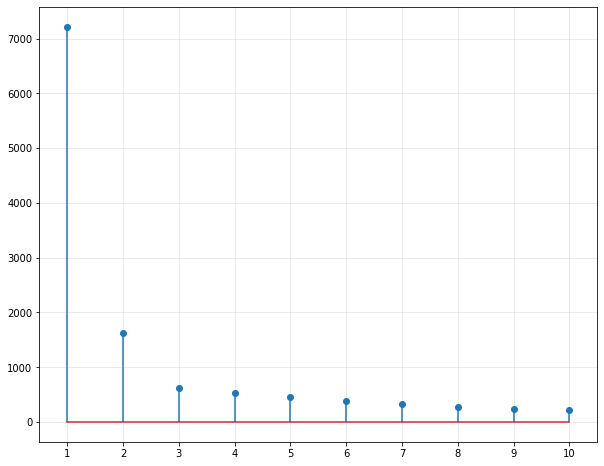

In [12]:
cost = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, random_state = 0).fit(X)
    cost.append(abs(kmeans.score(X)))

plt.figure(figsize = (10,8))
plt.stem(range(1,11), cost)
plt.xticks(np.arange(11))
plt.xlim([0.5, 10.5])
plt.grid(alpha = 0.3)
plt.show()